<a href="https://colab.research.google.com/github/carmeniturbe/sales-predictions/blob/main/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning Steps

In [469]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [470]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
set_config(display='diagram')


filename = "/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Proyectos Data Science/Project 1 - Sales Predictions/sales_predictions_2023.csv"

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [471]:
# Cheking for number of rows and colums
df.shape

(8523, 12)

In [472]:
# Cheking for data types of rows and colums only
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [473]:
# Cheking for duplicates -- Count the duplicates
df.duplicated()
df.duplicated().sum()

0

In [474]:
# General overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [475]:
# Examine the number of unique values in columns
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [476]:
# Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [477]:
df.groupby('Item_Identifier')['Item_Weight'].value_counts(dropna=False)   #https://stackoverflow.com/questions/

Item_Identifier  Item_Weight
DRA12            11.60          6
DRA24            19.35          5
                 NaN            2
DRA59            8.27           6
                 NaN            2
                               ..
NCZ42            10.50          5
NCZ53            9.60           4
                 NaN            1
NCZ54            14.65          5
                 NaN            2
Name: Item_Weight, Length: 2697, dtype: int64

In [478]:
# We can observe that each value of the "Item_Identifier" column always has the same weight.
# Therefore, we'll fill the empty weight values with the corresponding weight of each item

# we'll create a new df called df_Item_ID_cp
df_Item_ID_cp = df[['Item_Identifier', 'Item_Weight']]
df_Item_ID = df_Item_ID_cp[df['Item_Weight'].notna()].drop_duplicates()

In [479]:
# We merge the two data frames
df = pd.merge(df, df_Item_ID, on ='Item_Identifier', how ='left')
df


,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [480]:
# Now we have two item weight columns
# We'll use the 'df.where' method to fill in the missing values of 'Item_Weight_x' with the corresponding value from 'Item_Weight_y'.
df['Item_Weight_x'] = (df['Item_Weight_y']).where(df['Item_Weight_x'].isna(), df['Item_Weight_x'])

In [481]:
# Now we'll rename the 'Item_Weight' column
df.rename(columns={'Item_Weight_x': 'Item_Weight'}, inplace=True)

#We'll also delete the 'Item_Weight_y' column
df.drop(columns='Item_Weight_y', inplace=True)

In [482]:
df[['Item_Weight', 'Outlet_Size']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item_Weight  8519 non-null   float64
 1   Outlet_Size  6113 non-null   object 
dtypes: float64(1), object(1)
memory usage: 199.8+ KB


In [483]:
# We still have 4 missing values in the 'Item_Weight' column so we'll remove them
df.dropna(subset=['Item_Weight'], inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [484]:
#Checking the types of outlets
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [485]:
#it makes sence to move all the supermarkets into the same category
df['Outlet_Type']= df['Outlet_Type'].replace(["Supermarket Type1","Supermarket Type2","Supermarket Type3"], "Supermarket")
df['Outlet_Type'].value_counts()

Supermarket      7437
Grocery Store    1082
Name: Outlet_Type, dtype: int64

In [486]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [487]:
# We'll Standarize the values in the 'Item_Fat_Content' column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [488]:
# Check the 'Outlet_Size' to see if it can be turned into ordinal data
df['Outlet_Size'].value_counts()


Medium    2790
Small     2387
High       932
Name: Outlet_Size, dtype: int64

In [489]:
# We'll turn the 'Outlet_Size' into a ordinal data
replacement_dictionary = {'Small':1, 'Medium':2, 'High':3}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size'].value_counts()

2.0    2790
1.0    2387
3.0     932
Name: Outlet_Size, dtype: int64

In [490]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [518]:
#train test split
X = df.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.dtypes
#we drop the identifiers because they only help to identify, it is not a factor of items

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [492]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [493]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')  # to fill the missing values in the 'Outlet_Size' column
# Scaler
scaler = StandardScaler() # for numeric data
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False) # to turn categorical variables into a numerical representation

In [494]:
# Numeric pipeline
numeric_pipe = make_pipeline(freq_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

In [495]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [496]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder= 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f82dcd36ec0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f82dcbfe830>)])

In [497]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f82dcd36ec0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f82dcbfe830>)])

In [498]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [499]:
# checking the final values
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6389, 26)




array([[-0.70557556,  1.83797352,  1.3320594 , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.30400847, -0.28141255, -1.53516775, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.3463181 ,  1.69116347,  0.13738142, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.08837392, -0.74905057, -0.10155417, ...,  0.        ,
         0.        ,  1.        ],
       [-0.22039966, -0.37557106,  1.09312381, ...,  0.        ,
         0.        ,  1.        ],
       [-1.28403877, -0.51653555,  1.09312381, ...,  0.        ,
         0.        ,  1.        ]])

#Linear Regression Model

In [500]:
# Fit the Linear Regression model
sales_model = LinearRegression()
sales_model.fit(X_train_processed, y_train)

LinearRegression()

In [501]:
# predictions
# Train set predictions
train_preds = sales_model.predict(X_train_processed)
# Test set predictions
test_preds = sales_model.predict(X_test_processed)
print(train_preds)
print(test_preds)

[3774.97939574  202.46536187 3847.62805234 ... 1608.79884741 1826.53329208
 1711.78276477]
[2170.74921224 1191.64833084 -558.72941377 ... 1861.09085833 4174.55331187
 3983.87470876]


In [502]:
# Linear regresion R2 scores
train_score = sales_model.score(X_train_processed, y_train)
print(train_score)

0.5271927340568043


In [503]:
# Linear regresion R2 scores
test_score = sales_model.score(X_test_processed, y_test)
print(test_score)

0.5188218954890396


The test set results are comparable to the Training though is slightly above 50%

In [504]:
#RMSE
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, sales_model.predict(X_train_processed))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, sales_model.predict(X_test_processed))))

Training RMSE: 1175.5378103908606
Testing RMSE: 1176.813204725337


The Test mean square error (RMSE) is comparable (close) to the Training set mean square error (RMSE).

# Simple Decision Tree Model

In [505]:
# Fit the Deceision Tree model
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [506]:
# Predictions
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)
print(train_preds)
print(test_preds)

[ 515.3292  123.8388 5944.2624 ... 1821.6288 1649.8524 1627.881 ]
[ 992.7078  554.6114   89.883  ... 1697.79   3179.8608 2914.8724]


In [507]:
#R2 scores
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.1707267431559122


In [508]:
#hyperparameter adjustment
dec_tree.get_depth()

39

In [509]:
# List of values ​​to test for max_depth:
max_depth_range = list(range(2, 38))# will try every value between 2 and 38
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth,
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

print(r2)

[0.42698292892866274, 0.5148240695054436, 0.5777858054982128, 0.5967868080483785, 0.5916472077034576, 0.578673932195688, 0.5743799551561961, 0.5305063242333894, 0.5041112045501142, 0.4719458180518443, 0.4494902331147014, 0.42953103003448934, 0.40342454984698883, 0.3822496048658999, 0.3562515432126161, 0.3354378996055999, 0.3015160657961923, 0.29860768307545127, 0.2906471339052319, 0.2436321208802006, 0.24620957664438614, 0.2090946223802923, 0.2186921594760699, 0.20314148152281208, 0.1954142525323862, 0.18522018665654472, 0.16079715211306078, 0.18966389883224144, 0.19479336676183057, 0.19898077374507184, 0.1653510333041296, 0.1928465171808158, 0.18409055528579898, 0.17737960675760456, 0.17771330048245393, 0.17888128860853736]


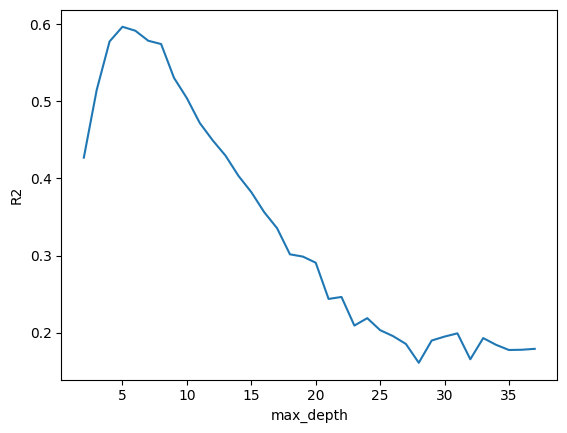

In [510]:
# Visualize what max_depth leads to a higher R2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [521]:
# Desicion Tree number 2
dec_tree_2 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
#R2
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print("R^2 Training score:", train_2_score)
print("R^2 Testing score:", test_2_score)

R^2 Training score: 0.6160308756204118
R^2 Testing score: 0.5916472077034576


In [512]:
#RMSE
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, dec_tree_2.predict(X_train_processed))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test,dec_tree_2.predict(X_test_processed))))

Training RMSE: 1059.3578354805206
Testing RMSE: 1084.107550470981


#Random Forest Model

In [513]:
rf = RandomForestRegressor(random_state=42)
rf


RandomForestRegressor(random_state=42)

In [514]:
#fit
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [515]:
#predict
rf.predict(X_test_processed)


array([2349.202062,  971.249066,  204.66692 , ..., 1716.212686,
       3670.728508, 4363.133876])

In [516]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print('Random Forests R^2 Training score:', rf_train_score)
print('Random Forests R^2 Testing score:', rf_test_score)

Random Forests R^2 Training score: 0.9371533045130749
Random Forests R^2 Testing score: 0.5456276921621659


In [520]:
rf_2 = RandomForestRegressor(max_depth = 6, random_state = 42)
rf_2.fit(X_train_processed, y_train)
rf_2_train_score = rf_2.score(X_train_processed, y_train)
rf_2_test_score = rf_2.score(X_test_processed, y_test)
print('Random Forests Optimized Training Score:', rf_2_train_score)
print('Random Forests Optimized Testing Score:', rf_2_test_score)
#better AND closer

Random Forests Optimized Training Score: 0.6250694432556143
Random Forests Optimized Testing Score: 0.6003007932873522


In [522]:
#RMSE
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_2.predict(X_train_processed))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test,rf_2.predict(X_test_processed))))

Training RMSE: 1046.8150307344442
Testing RMSE: 1072.5591384139607


#Model Evaluation and Findings:
Upon evaluating the performance of the Linear Regression model, we observed an R² score of 0.5271 for the training data and 0.5188 for the test data. Additionally, the RMSE values were calculated to be  1175.5378 for training and 1176.8132 for testing. These metrics suggest that the Linear Regression model captures a certain degree of variance, albeit with moderate predictive accuracy. The test RMSE indicates the average error between the predicted and actual values.

The performance of the Decision Tree Regressor model was very similar, The R² score for the training data was 0.6160, while the test data exhibited an R² score of 0.5916. The corresponding RMSE values for training and testing were 1059.35 and 1084.10, respectively.

In contrast, the Random Forest Model yielded more promising results. The R² score for the training data was 0.6250, while the test data exhibited an R² score of 0.6003. The corresponding RMSE values for training and testing were 1046.81 and 1072.55, respectively. The Decision Tree Regressor demonstrates better predictive ability and a closer fit to the actual values in comparison to the Linear Regression model.

#Conclusion and Recommendation:
Considering the presented findings, we can confidently recommend the Random Forest model for the dataset at hand. The model's superior R² scores and comparatively lower RMSE values on both training and testing data indicate a stronger ability to capture underlying patterns and generalize to unseen data. The Random Forest model offers improved predictive performance, making it a more suitable choice for our task.